In [1]:
#importing the libraries
import pandas as pd
import numpy as np

In [2]:
#Loading the dataset and displaying the dataset
df=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
#Gathering more information about the dataset
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
#shape
df.shape

(6435, 8)

In [6]:
#checking the missing values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
max_sales = df.groupby('Store')['Weekly_Sales'].max()

In [9]:
#Maximum Sales
df["Weekly_Sales"].max()

3818686.45

In [10]:
store_index=df['Weekly_Sales'].idxmax()# idxmax a method in python to get the indexes
store_no=df.loc[store_index,'Store']
 

In [11]:
#Store Number having maximum sales
print(store_no)

14


In [12]:
std_dev_by_store = df.groupby('Store')['Weekly_Sales'].std()


In [13]:
#max standard deviation
max_std_dev = std_dev_by_store.max()

max_std_dev.round(2)

317569.95

In [14]:
std_dev_by_store    #store no. 20 is having maximum standard deviation

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [15]:
sales_mean=df['Weekly_Sales'].mean()
sales_mean.round(2)

1046964.88

In [16]:
sales_std=df['Weekly_Sales'].std()
sales_std.round(2)

564366.62

In [17]:
#coefficiant if vaeriation
coff_var=sales_mean/sales_std
coff_var.round(2)

##Moderate level of variablity is seen

1.86

In [18]:
q3_2012_data=df[(df['Date']>='1-07-2012')&(df['Date']<='31-09-2012')]


In [19]:

q3_2012_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].sum()

In [20]:
pd.DataFrame(q3_2012_sales).head()


,Weekly_Sales
Store,
1,1.535298e+08
2,1.921572e+08
3,3.974450e+07
4,2.102617e+08
5,3.137791e+07


In [21]:
q2_2012_sales = df[(df['Date'] >= '01-04-2012') & (df['Date'] <= '30-06-2012')].groupby('Store')['Weekly_Sales'].sum()


In [22]:
pd.DataFrame(q2_2012_sales).head()

,Weekly_Sales
Store,
1,2.136943e+08
2,2.645559e+08
3,5.529368e+07
4,2.880344e+08
5,4.360768e+07


In [23]:
quarterly_growth_rate = ((q3_2012_sales - q2_2012_sales) / q2_2012_sales) * 100
pd.DataFrame(quarterly_growth_rate).head()

,Weekly_Sales
Store,
1,-28.154468
2,-27.366120
3,-28.121068
4,-27.001182
5,-28.044987


In [24]:
only_positive_growthrate=quarterly_growth_rate[quarterly_growth_rate>0]

In [25]:
pd.DataFrame(only_positive_growthrate)  #Hence no growth is found in the weekly sales

,Weekly_Sales
Store,


In [26]:
df['Holiday_Flag'].mode()

0    0
Name: Holiday_Flag, dtype: int64

In [27]:
SuperBowl=['12-02-2010', '11-02-2011', '10-02-2012', '08-02-2013']
LabourDay=['10-03-2010', '09-09-2011', '07-09-2012', '06-09-2013']
Thanksgiving=['26-11-2010', '25-11-2011', '23-11-2012', '29-11-2013']
Christmas=['31-12-2010', '30-12-2011', '28-12-2012', '27-12-2013']

In [28]:
Super_Bowl_sales = df.loc[df.Date.isin(SuperBowl)]['Weekly_Sales'].mean().round(2)
Labour_Day_sales = df.loc[df.Date.isin(LabourDay)]['Weekly_Sales'].mean().round(2)
Thanksgiving_sales = df.loc[df.Date.isin(Thanksgiving)]['Weekly_Sales'].mean().round(2)
Christmas_sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean().round(2)

In [29]:
Super_Bowl_sales, Labour_Day_sales, Thanksgiving_sales, Christmas_sales

(1079127.99, 1056592.08, 1471273.43, 960833.11)

In [30]:
non_holidaysales=df[(df['Holiday_Flag']==0)]['Weekly_Sales'].mean().round(2)
non_holidaysales

1041256.38

In [31]:
pd.DataFrame([{'Super Bowl Sales':Super_Bowl_sales,
              'Labour Day Sales':Labour_Day_sales,
              'Thanks giving Sales':Thanksgiving_sales,
              'Christmas Sales':Christmas_sales,
              'Non Holiday Sales':non_holidaysales}])
#Thanksgiving is the day having the highest sales 

,Super Bowl Sales,Labour Day Sales,Thanks giving Sales,Christmas Sales,Non Holiday Sales
0,1079127.99,1056592.08,1471273.43,960833.11,1041256.38


In [32]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

/tmp/ipykernel_212/3013172752.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day'] = pd.DatetimeIndex(df['Date']).day
/tmp/ipykernel_212/3013172752.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Date']).month
/tmp/ipykernel_212/3013172752.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.DatetimeIndex(df['Date']).year


In [33]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [34]:

sales_2010 = df[df['Year'] == 2010]['Weekly_Sales'].sum().round(2)#Sales in 2010
sales_2011=df[df['Year'] == 2011]['Weekly_Sales'].sum().round(2)#Sales in 2011
sales_2012=df[df['Year'] == 2012]['Weekly_Sales'].sum().round(2)#Sales in 2012

In [35]:
pd.DataFrame([{'sales 2010':sales_2010,'sales2011':sales_2011,'sales 2011':sales_2012}])

,sales 2010,sales2011,sales 2011
0,2.288886e+09,2.448200e+09,2.000133e+09


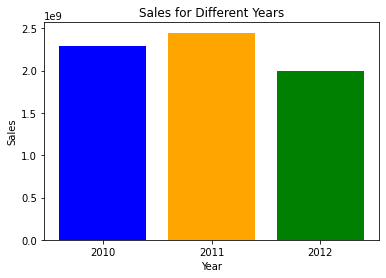

In [36]:
import matplotlib.pyplot as plt
sales_values = [sales_2010, sales_2011, sales_2012]

# Creating a list of years
years = ['2010', '2011', '2012']

# Plotting the sales data
plt.bar(years, sales_values, color=['blue', 'orange', 'green'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales for Different Years')

plt.show()

# year 2011 has the highest weekly sales


In [37]:
import seaborn as sns



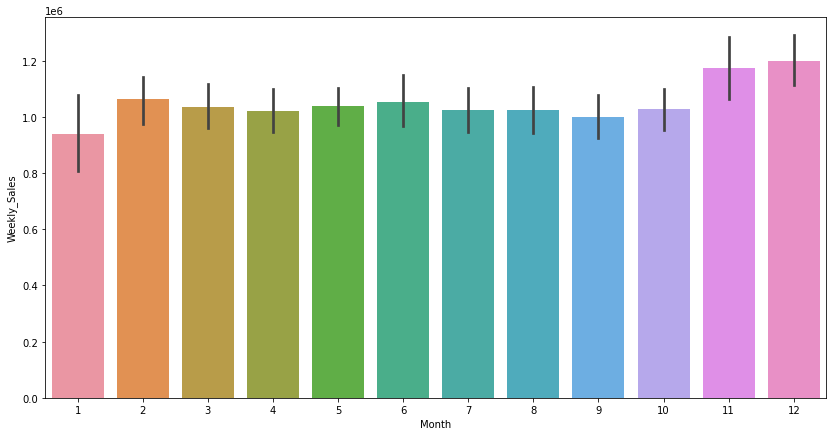

In [38]:
#Sales for year 2011
plt.figure(figsize=(14,7))
graph_2010 = sns.barplot(data=df, x=df[df.Year==2010]['Month'], y=df[df.Year==2010]['Weekly_Sales'])
plt.show()
#December month has highest weekly sales

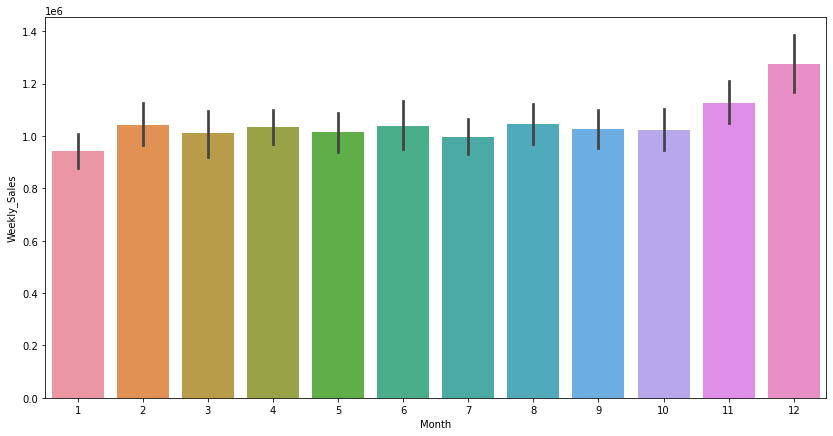

In [39]:
df_2011 = df[df['Year'] == 2011]


plt.figure(figsize=(14, 7))
sns.barplot(data=df_2011, x='Month', y='Weekly_Sales')
plt.show()

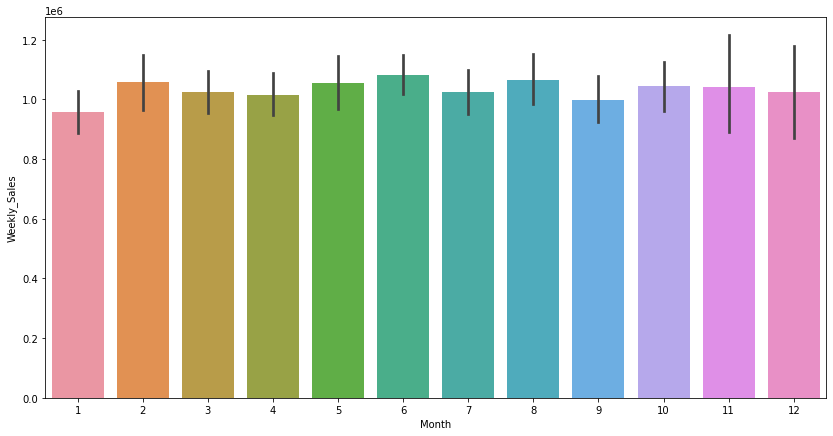

In [40]:
df_2011 = df[df['Year'] == 2012]


plt.figure(figsize=(14, 7))
sns.barplot(data=df_2011, x='Month', y='Weekly_Sales')
plt.show()

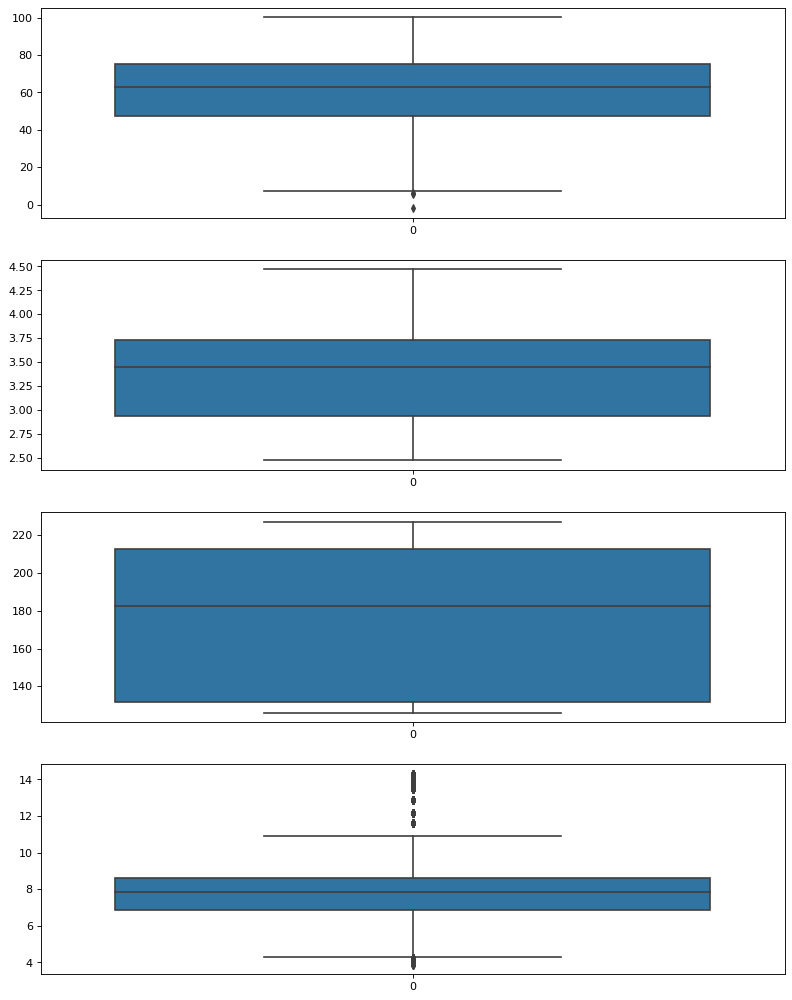

In [41]:
#outliers in the dataset
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])

##outliers in the dataset


In [42]:
df=df[df['Unemployment']<=11]
df=df[df['Unemployment']>=5]
df=df[df['Temperature']>=5]
#After removing the outliers

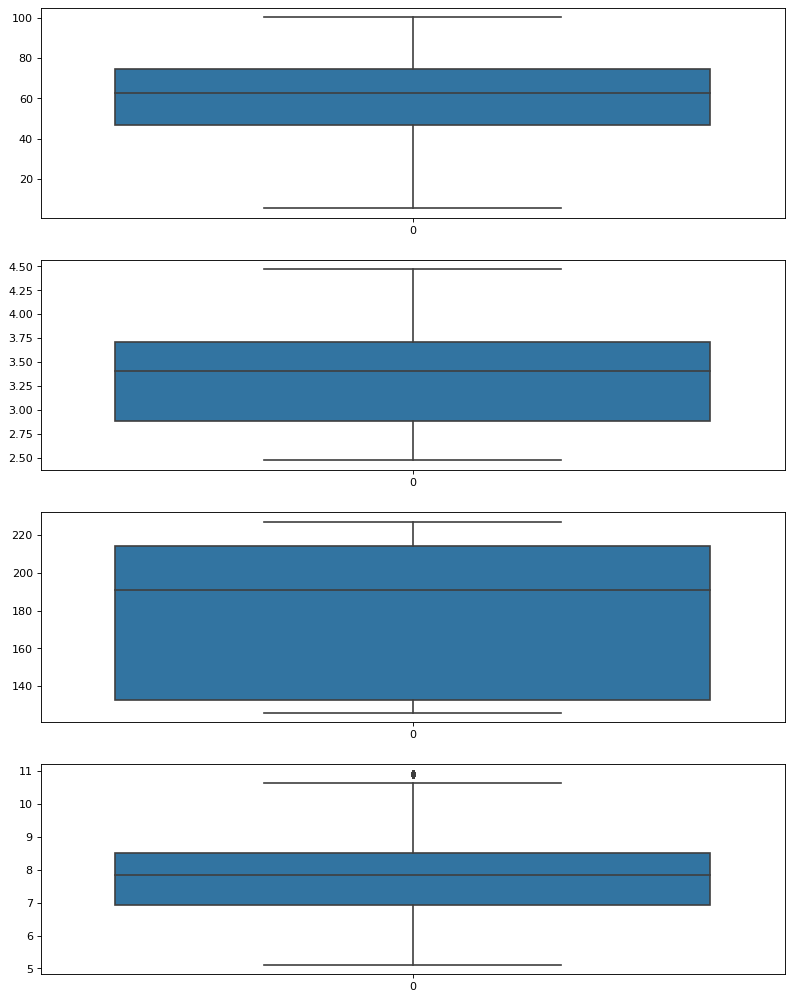

In [43]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = df[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(df[column], ax=axis[i])


In [44]:
#building the model

x=df[['Store', 'Fuel_Price', 'CPI', 'Unemployment', 'Day', 'Month', 'Year']]
y=df['Weekly_Sales']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
#Testing which algorithm is good


In [47]:
#Linear Regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
print("Train Accuracy",lr.score(x_train,y_train).round(5)*100,"%")
print("Test Accuracy",r2_score(y_test,lr_pred).round(5)*100,"%")
print("Mean Squared Error",metrics.mean_squared_error(y_test,lr_pred).round(3))

Train Accuracy 12.416 %
Test Accuracy 14.329 %
Mean Squared Error 284863817270.409


In [50]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rfal=RandomForestRegressor()
rfal.fit(x_train,y_train)
rf_pred=rfal.predict(x_test)
print("Train Accuracy",rfal.score(x_train,y_train).round(5)*100,"%")
print("Test Accuracy",r2_score(y_test,rf_pred).round(5)*100,"%")
print("Mean Squared Error",metrics.mean_squared_error(y_test,rf_pred).round(3))

Train Accuracy 99.357 %
Test Accuracy 92.609 %
Mean Squared Error 24577435693.261


In [51]:
#RidgeCV
from sklearn.linear_model import RidgeCV
rd=RidgeCV()
rd.fit(x_train,y_train)
rd_pred=rd.predict(x_test)
print("Train Accuracy",rd.score(x_train,y_train).round(5)*100,"%")
print("Test Accuracy",r2_score(y_test,rd_pred).round(5)*100,"%")
print("Mean Squared Error",metrics.mean_squared_error(y_test,rd_pred).round(3))

Train Accuracy 12.416 %
Test Accuracy 14.324 %
Mean Squared Error 284882997287.132


In [52]:
#Cross Validatkon

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
#Linear Regression
lr_scores = cross_val_score(lr, x_train,y_train, cv=10, scoring='r2')
print(lr_scores)
print("Mean Score:", lr_scores.mean()*100,'%')

[0.13083929 0.12316283 0.12085679 0.0775085  0.17947403 0.09470198
 0.10206283 0.16414818 0.11563849 0.08514938]
Mean Score: 11.93542281811304 %


In [55]:
#Random Forest
rf_score=cross_val_score(rfal, x_train,y_train, cv=10, scoring='r2')
print(rf_score)
print("Mean Score:", rf_score.mean()*100,'%')

[0.95276397 0.9470132  0.95218594 0.9410428  0.9508974  0.9494209
 0.95463206 0.96691822 0.95136631 0.95471509]
Mean Score: 95.20955874136382 %


In [56]:
#RidgeCV
rd_score=cross_val_score(rd, x_train,y_train, cv=10, scoring='r2')
print(rd_score)
print("Mean Score:", rd_score.mean()*100,'%')

[0.13083042 0.12312217 0.12085641 0.07767534 0.17933452 0.09476475
 0.1021415  0.16398219 0.11562841 0.08528928]
Mean Score: 11.936249823373016 %


In [57]:
#Random Forest is the good algorithm and approx 94% accuracy and it can be considerd as the good model for weekly sales